# 7 Numerical Methods of Solving High-Degree Equations

## 7.1 Fixed-Point Iteration Methods

Suppose we want to find the roots of  the equation $f(x) = 0$. 

1.  **Re-arrange** the equation so that the variable is put on the left side. For example, $2x^2-5x+3=0$ can be written as 
$$x=\dfrac{2x^2+3}{5}$$ or $$x=\sqrt{\dfrac{5x-3}{2}}$$
2. **Assume** an initial value to start the first iteration.
3. **Substitute** the initial value in the right side of the equation and calculate a **new value** for the variable 
$$
x_{new}= 0.5x^2+0.5
$$
4. If the **new value** of the variable *is not equal* to the previous value, consider the **new** one as the value of the variable. 
5. **Repeat** steps 3 and 4 until the new value *is equal* to the old value of the variable. 
6. If the new value does not approach the old value (the difference between $x$ and $x_{new}$ increases at each iteration), **stop**.
Try another initial value of another rearrangement of the given equation.

In [24]:
from math import *

def simple_fp_method(f, initial_guess, tol):
    x_old = initial_guess
    for iteration in range(1,101): 
        x_new = f(x_old)
        if abs(x_new - x_old) < tol:
            break 
        x_old = x_new
    print('The root is: %0.5f' %x_new)
    print('The number of iteration is: %d' %iteration)

In [25]:
f1 = lambda x: (2*x**2 + 3)/5
initial_guess = 0
tol = 0.00001
simple_fp_method(f1, initial_guess, tol)



The root is: 0.99996
The number of iteration is: 39


You may try different initial_guess and tol.

In [15]:
def choice(f):
    initial_guess = float(input('Please enter your initial guess: '))
    tol = float(input('Please enter your tol: '))
    simple_fp_method(f, initial_guess, tol)
    response = input('Do you want to make another choice? y/n \n')
    if 'n' in response:
        print('Done!')
    else:
        choice(f)
        
choice(f1)

Please enter your initial guess: -1
Please enter your tol: 0.1
The root is: 1.00000
The number of iteration is: 2
Do you want to make another choice? y/n 
n
Done!


Let us sketch a graph of $f_1(x) = \dfrac{2x^2+3}{5}$ and $y=x$.

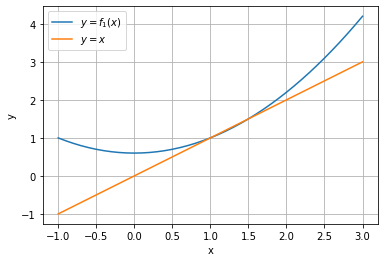

In [21]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-1, 3.1, 0.1)
plt.plot(x, f1(x),'-', label = "$y=f_1(x)$")
plt.plot(x, x,'-', label = "$y=x$")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend(loc =0)
plt.show()



Let us try to plot all approximations we found so far. 

In [27]:
initial_guess = 0
x_old_list = []
x_new_list = []
itr_list = []
x_old = initial_guess
tol = 0.00001

for iteration in range(1,51):
    x_new = f1(x_old)
    # savling for plotting
    x_old_list.append(x_old)
    x_new_list.append(x_new)
    itr_list.append(iteration)
    # convergence condition
    if abs(x_new - x_old) < tol:
        break 
    x_old = x_new

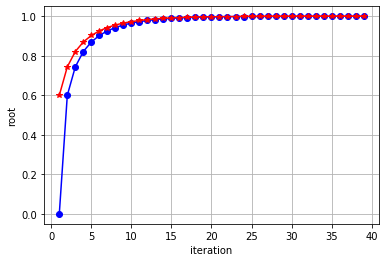

In [28]:
plt.plot(itr_list, x_old_list, 'b-o', label = "x_old" )
plt.plot(itr_list, x_new_list, 'r-*', label = "x_new")
plt.xlabel('iteration')
plt.ylabel('root')
plt.grid(True)
plt.show()

Now if we want to see what happens when we change the initial guess, we have to copy the above code and run it again. It would be better if we could write an appropriate function and call it if necessary.   

In [110]:
def check_convergence(f, initial_guess, tol = 0.00001, N_iter = 50, min = -1, max = 2.1):
    x_old_list = []
    x_new_list = []
    itr_list = []
    x_old = initial_guess
    
    for iteration in range(1,N_iter):
        x_new = f(x_old)
        # savling for plotting
        x_old_list.append(x_old)
        x_new_list.append(x_new)
        itr_list.append(iteration)
        # convergence condition
        if abs(x_new - x_old) < tol:
            break 
        x_old = x_new
    print('number of iterations is ', iteration)
    print('The approximate root is ', x_new)
    
    # plotting
    plt.plot(itr_list, x_old_list, 'b-o', label = "x_old" )
    plt.plot(itr_list, x_new_list, 'r-*', label = "x_new")
    plt.xlabel('iteration')
    plt.ylabel('root')
    plt.grid(True)
    plt.show()
    
    x = np.arange(min, max, 0.1)
    plt.plot(x, f(x),'-', label = "$y=f(x)$")
    plt.plot(x, x,'-', label = "$y=x$")
    plt.plot(x_old_list, x_old_list, 'bo', label = "x_old" )
    plt.plot(x_old_list, x_new_list, 'r*', label = "x_new" )
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend(loc =0)
    plt.show()
    

You may try with different initial guesses.

number of iterations is  39
The approximate root is  0.9999605102777208


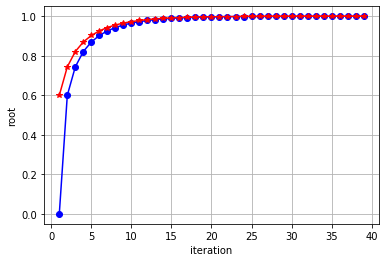

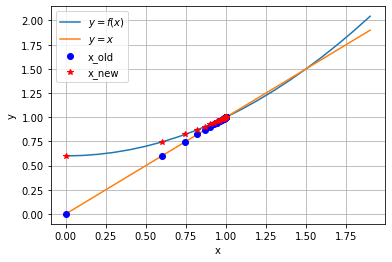

In [111]:
check_convergence(f1, initial_guess= 0, min = 0, max = 2)

number of iterations is  9
The approximate root is  18.594441894627174


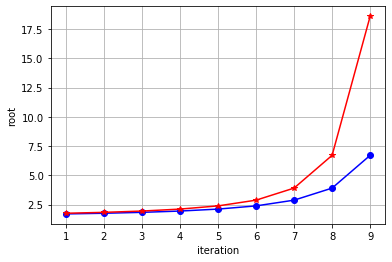

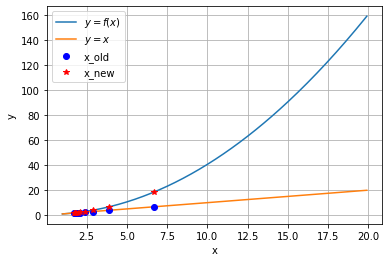

In [112]:
check_convergence(f1, initial_guess= 1.7, N_iter = 10, min = 1, max = 20)

Let us try another function $f(x) = \sqrt{\dfrac{5x-3}{2}} $.

number of iterations is  53
The approximate root is  1.5000450035476582


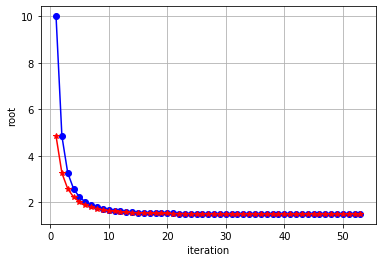

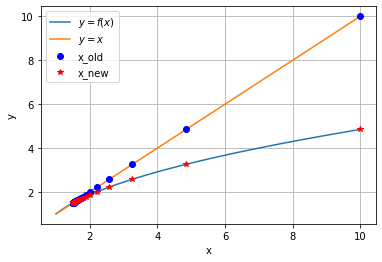

In [114]:
f2 = lambda x: np.sqrt((5*x-3)/2)
check_convergence(f2, initial_guess= 10, N_iter = 100, min = 1, max = 10.1)

You may try with different initial guesses.

number of iterations is  54
The approximate root is  1.500048443972298


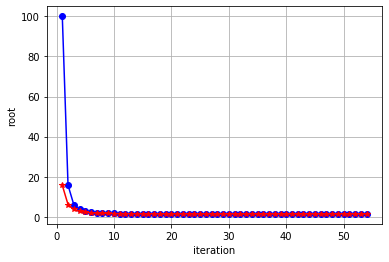

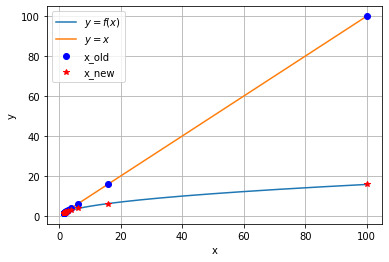

In [117]:
check_convergence(f2, initial_guess= 100, N_iter = 100, min = 1, max = 100.1)

Your turn: Solve the equation $x^3-5x^2+6x = 0$ using the simple fixed-point iteration methods.

## 7.2 Newton-Raphson's Method

This method is one of the most powerful and well-known numerical methods for solving a root-finding problem $f(x)=0$. The idea is to construct the following sequence. 
$$
\begin{cases}
x_0 =a\\
x_{n+1} = x_n - \dfrac{f(x_n)}{f'(x_n)}
\end{cases}
$$
For example, we want to solve the equation $2x^2-5x+3=0$ using the Newton-Raphson's method.

In [120]:
def NR_method(f, initial_guess, tol):
    x_old = initial_guess
    h = 0.01
    # Calculate the derivative of f
    df = lambda x: (f(x+h)-f(x-h))/(2*h)
    g = lambda x: x - f(x)/df(x)
    for iteration in range(1,101): 
        x_new = g(x_old)
        if abs(x_new - x_old) < tol:
            break 
        x_old = x_new
    print('The root is: %0.5f' %x_new)
    print('The number of iteration is: %d' %iteration)

In [121]:
f = lambda x: 2*x**2 - 5*x + 3
NR_method(f, initial_guess = 0, tol=0.0001)

The root is: 1.00000
The number of iteration is: 6


In [134]:
f = lambda x: 2*np.power(x,2) - 5*x + 3
NR_method(f, initial_guess = 2, tol=0.0001)

The root is: 1.50000
The number of iteration is: 5


In [156]:
def check_convergence_RN(f, initial_guess, tol = 0.00001, N_iter = 50, min = -1, max = 2.1):
    x_old_list = []
    x_new_list = []
    itr_list = []
    x_old = initial_guess
    h = 0.01
    df = lambda x: (f(x+h)-f(x-h))/(2*h)
    g = lambda x: x - f(x)/df(x)
    
    for iteration in range(1,N_iter):
        x_new = g(x_old)
        # savling for plotting
        x_old_list.append(x_old)
        x_new_list.append(x_new)
        itr_list.append(iteration)
        # convergence condition
        if abs(x_new - x_old) < tol:
            break 
        x_old = x_new
    x_old_list = np.array(x_old_list)
    x_new_list = np.array(x_new_list)
    print('number of iterations is ', iteration)
    print('The approximate root is ', x_new)
    
    # plotting
    plt.plot(itr_list, x_old_list, 'b-o', label = "x_old" )
    plt.plot(itr_list, x_new_list, 'r-*', label = "x_new")
    plt.xlabel('iteration')
    plt.ylabel('root')
    plt.grid(True)
    plt.show()
    
    x = np.arange(min, max, 0.1)
    plt.plot(x, f(x),'-', label = "$y=f(x)$")
    plt.plot(x_old_list, f(x_old_list), 'bo', label = "x_old" )
    plt.plot(x_new_list, f(x_new_list), 'r*', label = "x_new" )
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend(loc =0)
    plt.show()
    

number of iterations is  6
The approximate root is  0.9999999999973138


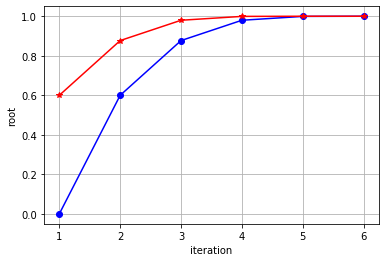

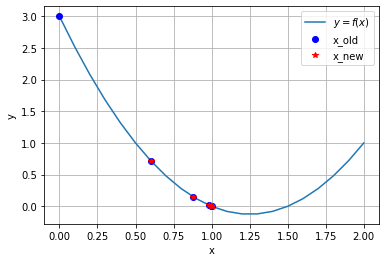

In [159]:
check_convergence_RN(f, initial_guess = 0, N_iter = 100 , min = 0, max = 2.1)

number of iterations is  5
The approximate root is  1.5000000001164155


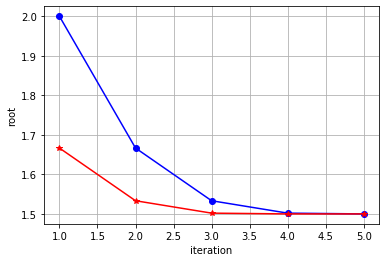

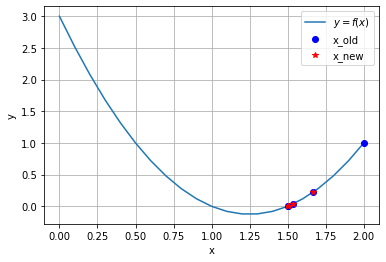

In [160]:
check_convergence_RN(f, initial_guess = 2, N_iter = 100 , min = 0, max = 2.1)

In [161]:
g = lambda x: np.cos(x)-x
NR_method(g, initial_guess = 0, tol=0.0001)

The root is: 0.73909
The number of iteration is: 4


In [166]:
NR_method(g, initial_guess = -2, tol=0.0001)

The root is: 0.73909
The number of iteration is: 6


number of iterations is  5
The approximate root is  0.7390851332151607


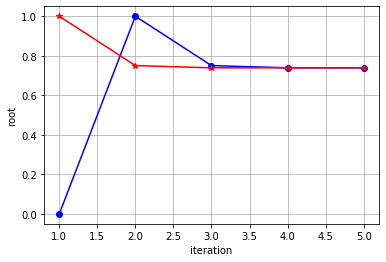

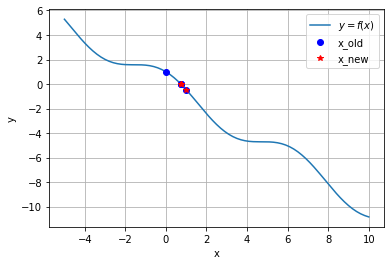

In [170]:
check_convergence_RN(g, initial_guess = 0, N_iter = 100 , min = -5, max = 10.1)

Your turn: Solve the equation $x*2 + \cos^2x - 4x = 0$ using Newton-Raphson's method. 